# **Property Sale Prices Study Notebook**

## Objectives
* Answer business requirement:
    * The client is interested to understand the patterns from the customer base, so the client can learn the most relevant variables that are correlated to a churned customer.
    * The client is interested in predicting the house sales price from her four inherited houses, and any other house in Ames, Iowa.

## Inputs
* outputs/datasets/collection/Ames_Iowa_House.csv

## Outputs
* generate code that answers business requirement and can be used to build the Streamlit App.

___
# Change working directory
* We need to change the working directory from its current folder to its parent folder

    * We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-project--Predictive-Analytics/jupyter_notebooks'

We want to make the parent of the current directory the new current directory:

* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory:

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-project--Predictive-Analytics'

____
# Load Data


In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/Ames_Iowa_House.csv")
    )
df.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


# Data Exploration
* We utilize ProfileReport to gain a deeper understanding of the dataset. This tool provides insights into variable types and distributions, as well as levels of missing data, among other details:

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df=df, minimal=True)
profile.to_notebook_iframe()

/tmp/ipykernel_7691/599503930.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df = df.drop(columns=['2ndFlrSF', 'BedroomAbvGr', 'BsmtFinType1', 'EnclosedPorch', 'GarageFinish', 'GarageYrBlt', 'LotFrontage', 'WoodDeckSF'])

In [7]:
df = df.dropna()

df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459],
           dtype='int64', length=1452)

# Correlation Study

In [8]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(5)

(1452, 23)


,1stFlrSF,BsmtFinSF1,BsmtUnfSF,GarageArea,GrLivArea,LotArea,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,...,SalePrice,BsmtExposure_No,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Av,BsmtExposure_None,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,706,150,548,1710,8450,196.0,61,5,7,...,208500,1,0,0,0,0,1,0,0,0
1,1262,978,284,460,1262,9600,0.0,0,8,6,...,181500,0,1,0,0,0,0,1,0,0
2,920,486,434,608,1786,11250,162.0,42,5,7,...,223500,0,0,1,0,0,1,0,0,0
3,961,216,540,642,1717,9550,0.0,35,5,7,...,140000,1,0,0,0,0,1,0,0,0
4,1145,655,490,836,2198,14260,350.0,84,5,8,...,250000,0,0,0,1,0,1,0,0,0


We utilize the .corr() function to compute correlations using both Spearman and Pearson methods. We then explore the top 10 correlations.

* Upon execution, this command yields a pandas series. The initial entry represents the correlation between 'Churn' and itself, inevitably resulting in 1. To disregard this redundant correlation, we exclude it by slicing with [1:].

* To sort the correlations by their absolute values, we specify 'key=abs' during sorting.




* Spearman method:

In [9]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.809144
GrLivArea         0.731110
YearBuilt         0.652256
GarageArea        0.648706
TotalBsmtSF       0.602441
KitchenQual_TA   -0.580641
1stFlrSF          0.575999
YearRemodAdd      0.570424
KitchenQual_Gd    0.479097
OpenPorchSF       0.476819
Name: SalePrice, dtype: float64

* Pearson method:

In [10]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.789997
GrLivArea         0.710080
GarageArea        0.622492
TotalBsmtSF       0.612971
1stFlrSF          0.606849
YearBuilt         0.522896
KitchenQual_TA   -0.519650
YearRemodAdd      0.507158
KitchenQual_Ex    0.500200
MasVnrArea        0.477493
Name: SalePrice, dtype: float64

As anticipated, we observe a noteworthy positive correlation between the sale price of a property and its quality, size, and year of construction.

To facilitate a more comprehensive comparison between house size and sale price, we plan to amalgamate all pertinent size-related variables. Additionally, we will consider reintroducing variables previously excluded, presuming that missing data signifies the absence of certain features such as a basement. This approach aims to provide a comprehensive total square footage for a more precise evaluation of their correlation against sale price.

___
# Variables Distribution by Sale Prices

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

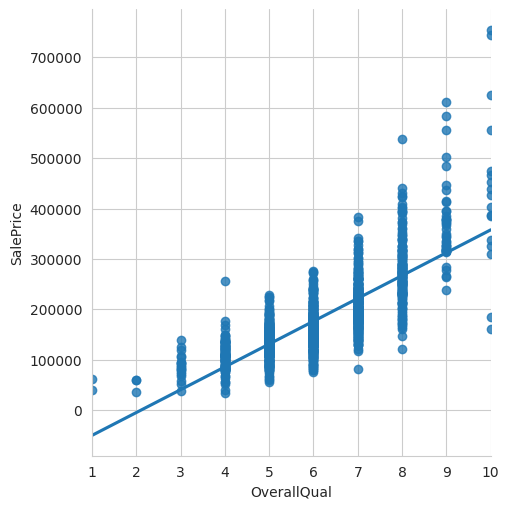

In [12]:
%matplotlib inline
sns.set_style("whitegrid")
sns.lmplot(data=df, x="OverallQual", y="SalePrice", ci=None)
plt.show()

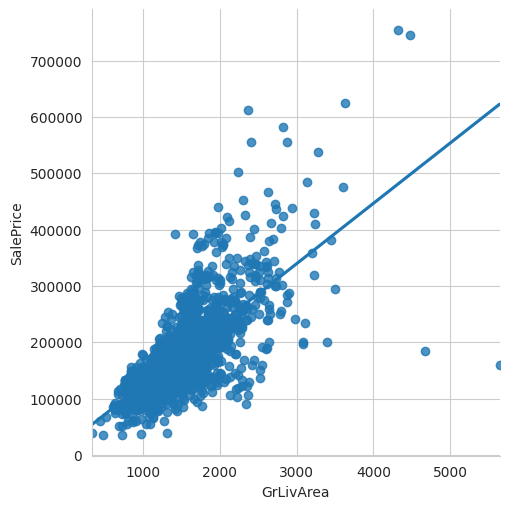

In [13]:
sns.lmplot(data=df, x="GrLivArea", y="SalePrice", ci=None)
plt.show()

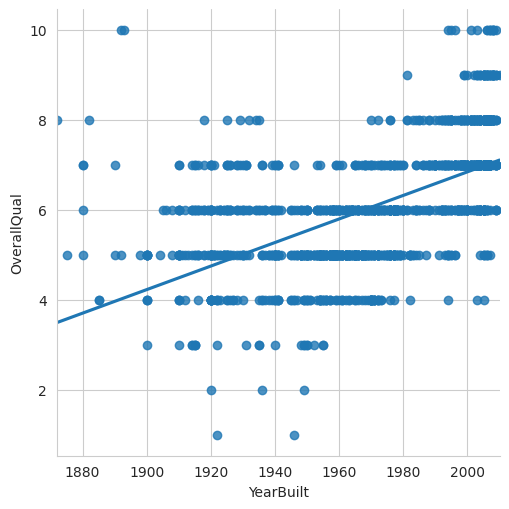

In [14]:
sns.lmplot(data=df, x="YearBuilt", y="OverallQual", ci=None)
plt.show()


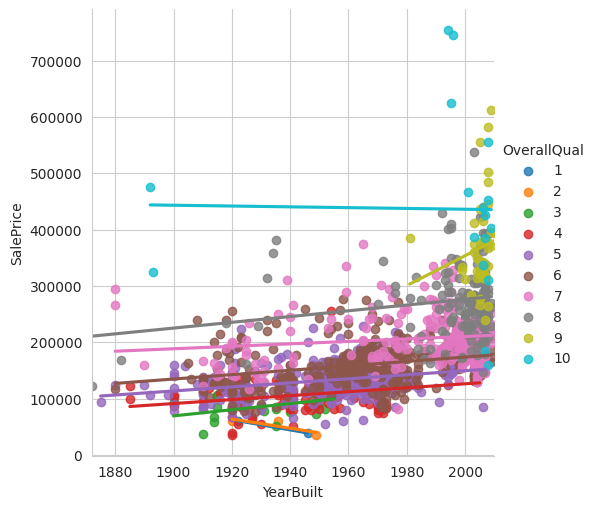

In [15]:
sns.lmplot(data=df, x="YearBuilt", y="SalePrice", ci=None, hue='OverallQual' )
plt.show()

___
# Conclusions and Next steps:


Based on our correlation and plot analysis, we can draw several conclusions that address the first business question:

The client wants to understand how various house attributes relate to the typical sale price of a house.

In summary:

* Larger houses tend to have higher sale prices.
* Homes with higher overall quality generally have higher sale prices.
* Newer houses sometimes sell for higher prices, likely because newer constructions tend to have better overall quality.
* Another hypothesis was that houses with recent remodels have higher sale prices. While the correlation between recent remodeling and sale price is weak, there is a stronger correlation between recent remodeling and overall quality. Overall quality remains the most significant factor in predicting the sale price.